In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# problem 1
# import data
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# problem 1 part a
# select the variables
SalePrice = pd.DataFrame(houseData['SalePrice'])  
GrLivArea = pd.DataFrame(houseData['GrLivArea'])

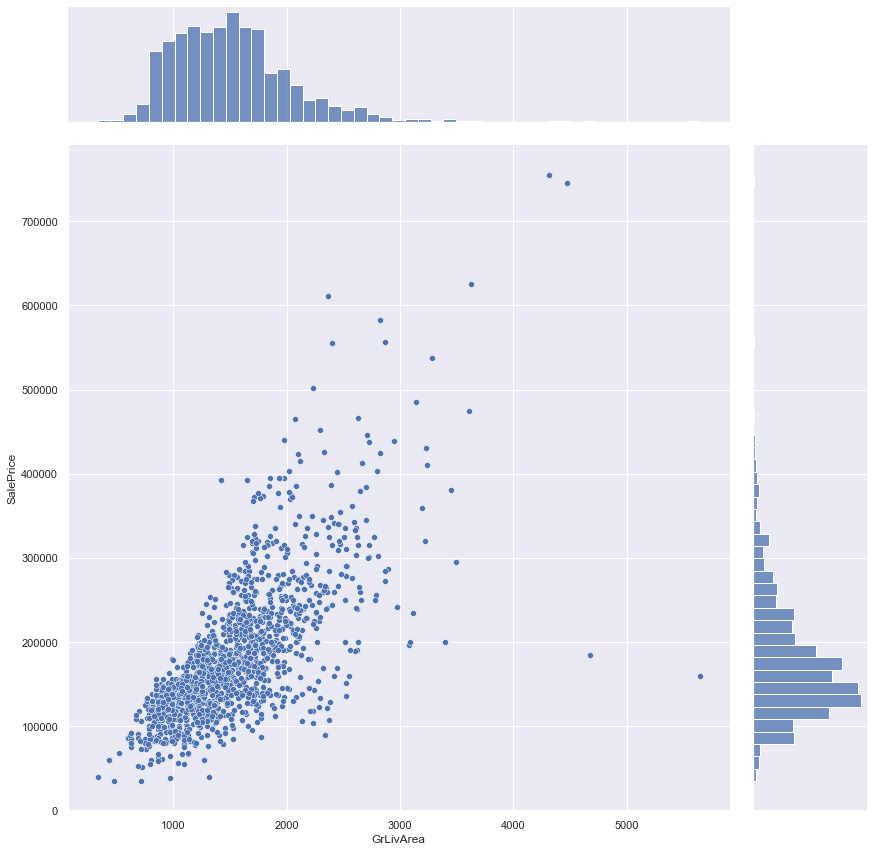

In [5]:
# plot the variable to see the relationship
GrLivSale = pd.concat([GrLivArea, SalePrice], axis = 1).reindex(SalePrice.index)
sb.jointplot(data = GrLivSale, x = "GrLivArea", y = "SalePrice", height = 12)

<AxesSubplot:>

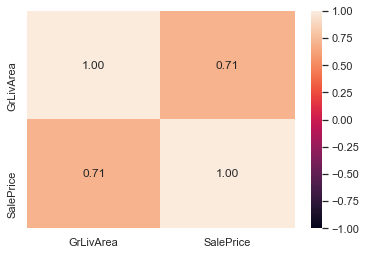

In [6]:
# problem 1 part b
# see the correlation
sb.heatmap(GrLivSale.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [7]:
# problem 1 part c
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [8]:
# problem 1 part d
#Set up the regression problem with Train and Test datasets.
#Train Set with 1100 samples and Test Set with 360 samples.
SalePrice_train = pd.DataFrame(SalePrice[:1100])
GrLivArea_train = pd.DataFrame(GrLivArea[:1100])
SalePrice_test = pd.DataFrame(SalePrice[-360:])
GrLivArea_test = pd.DataFrame(GrLivArea[-360:])

In [9]:
# problem 1 part e
# Train the Linear Regression model
linreg.fit(GrLivArea_train, SalePrice_train)

LinearRegression()

In [10]:
# problem 1 part f
# SalePrice = a*GrLivArea + b
print('Coefficients \t: a = ', linreg.coef_)
print('Intercept \t: b = ', linreg.intercept_)

Coefficients 	: a =  [[113.88950443]]
Intercept 	: b =  [9498.33463562]


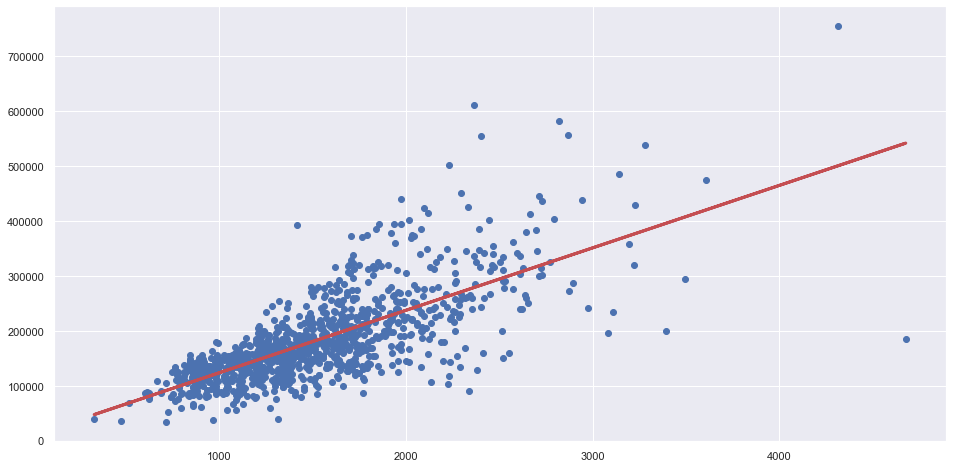

In [11]:
# Formula for the Regression line
regline_x = GrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * GrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [12]:
# problem 1 part g
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

SalePrice_train_pred = linreg.predict(GrLivArea_train)
mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036


In [13]:
# problem 1 part h
# Predict SalePrice corresponding to GrLivArea_test
SalePrice_test_pred = linreg.predict(GrLivArea_test)

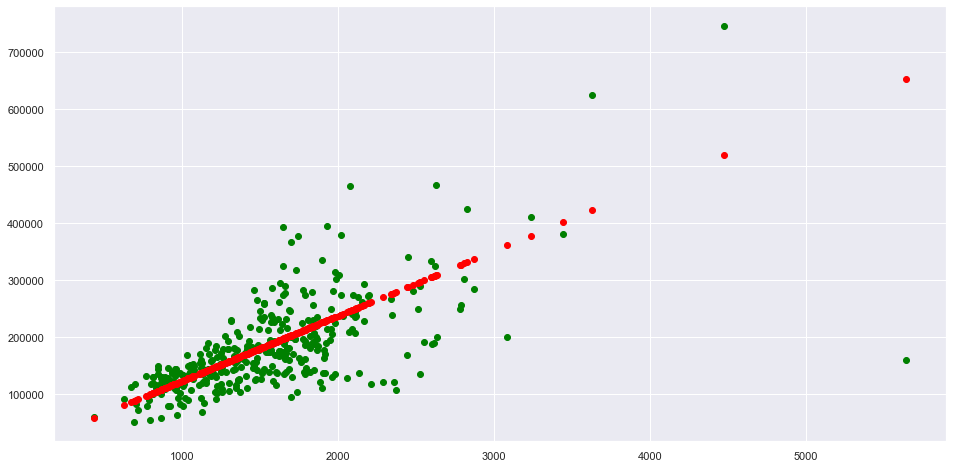

In [14]:
# problem 1 part i
# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_test, SalePrice_test, color = "green")
plt.scatter(GrLivArea_test, SalePrice_test_pred, color = "red")
plt.show()

In [15]:
# problem 1 part j
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_test, SalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.40117720006925783
Mean Squared Error (MSE) 	: 3737081522.29609


In [16]:
# problem 2 part a for LotArea
# repeat the previous methods with LotArea variable
LotArea = pd.DataFrame(houseData['LotArea'])

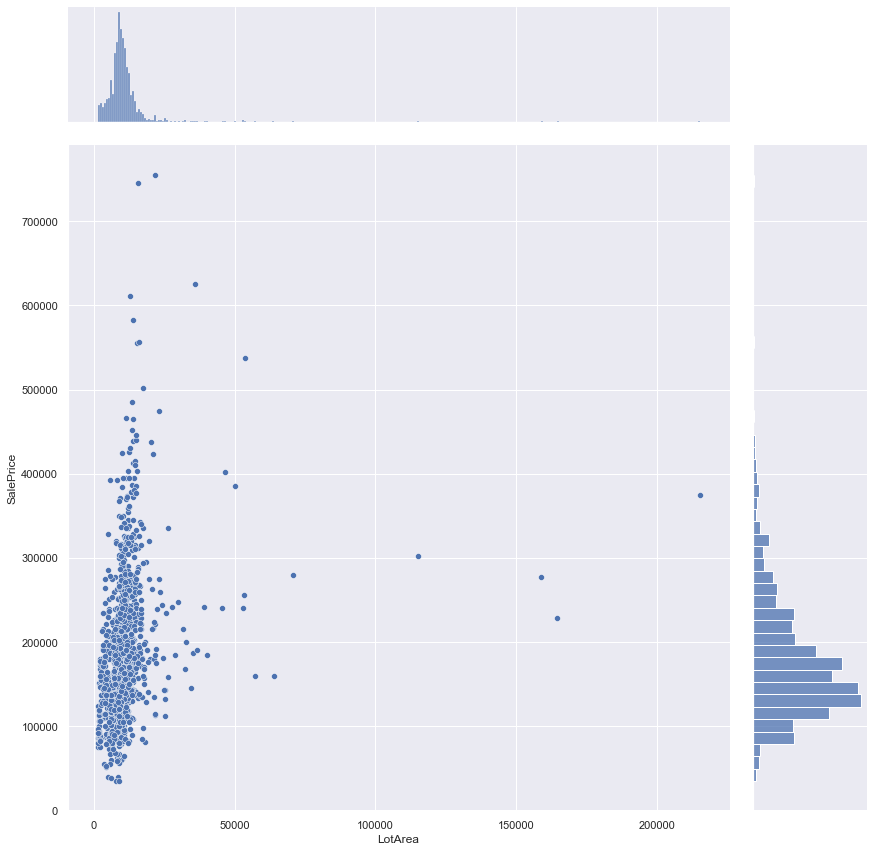

In [18]:
LotSale = pd.concat([LotArea, SalePrice], axis = 1).reindex(SalePrice.index)
sb.jointplot(data = LotSale, x = "LotArea", y = "SalePrice", height = 12)

<AxesSubplot:>

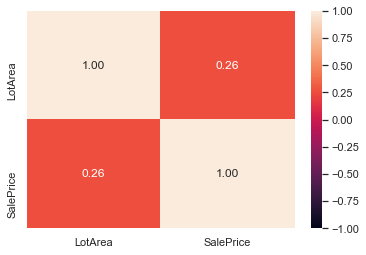

In [19]:
# problem 2 part b for LotArea
sb.heatmap(LotSale.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [20]:
# problem 2 part c for LotArea
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [21]:
# problem 2 part d for LotArea
LotArea_train = pd.DataFrame(LotArea[:1100])
LotArea_test = pd.DataFrame(LotArea[-360:])

In [22]:
# problem 2 part e and f for LotArea
linreg.fit(LotArea_train, SalePrice_train)
# SalePrice = a*LotArea + b
print('Coefficients \t: a = ', linreg.coef_)
print('Intercept \t: b = ', linreg.intercept_)

Coefficients 	: a =  [[1.91881242]]
Intercept 	: b =  [160963.95370929]


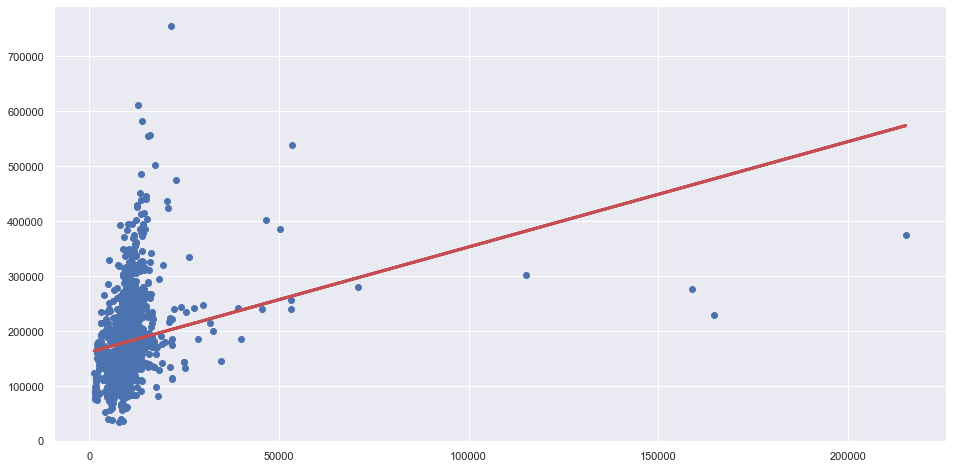

In [23]:
# Formula for the Regression line
regline_x = LotArea_train
regline_y = linreg.intercept_ + linreg.coef_ * LotArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(LotArea_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [24]:
# problem 2 part g for LotArea
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(LotArea_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

SalePrice_train_pred = linreg.predict(LotArea_train)
mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.06996047063721678
Mean Squared Error (MSE) 	: 5885258821.936573


In [25]:
# problem 2 part h for LotArea
SalePrice_test_pred = linreg.predict(LotArea_test)

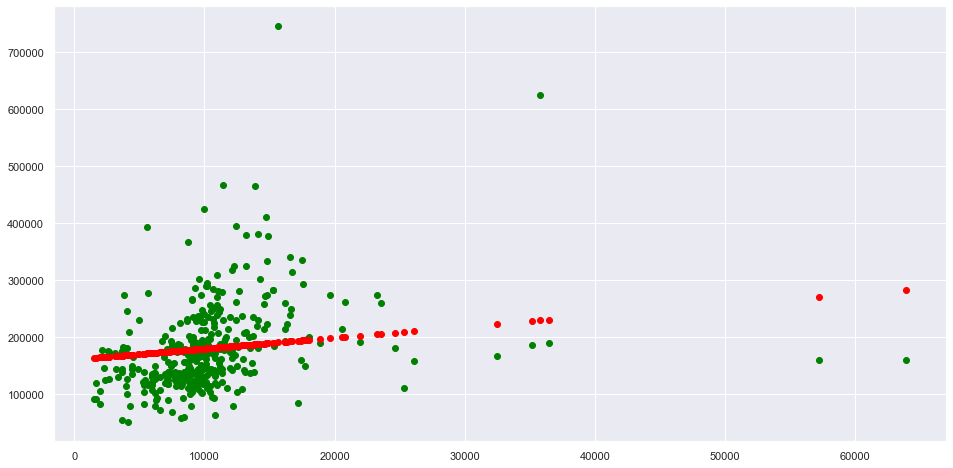

In [48]:
# problem 2 part i for LotArea
f = plt.figure(figsize=(16, 8))
plt.scatter(LotArea_test, SalePrice_test, color = "green")
plt.scatter(LotArea_test, SalePrice_test_pred, color = "red")
plt.show()

In [26]:
# problem 2 part j for LotArea
print("Explained Variance (R^2) \t:", linreg.score(LotArea_test, SalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.06617868448896169
Mean Squared Error (MSE) 	: 5827711275.733228


In [27]:
# problem 2 part a for TotalBsmtSF
# repeat the previous methods with TotalBsmtSF variable
TotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])

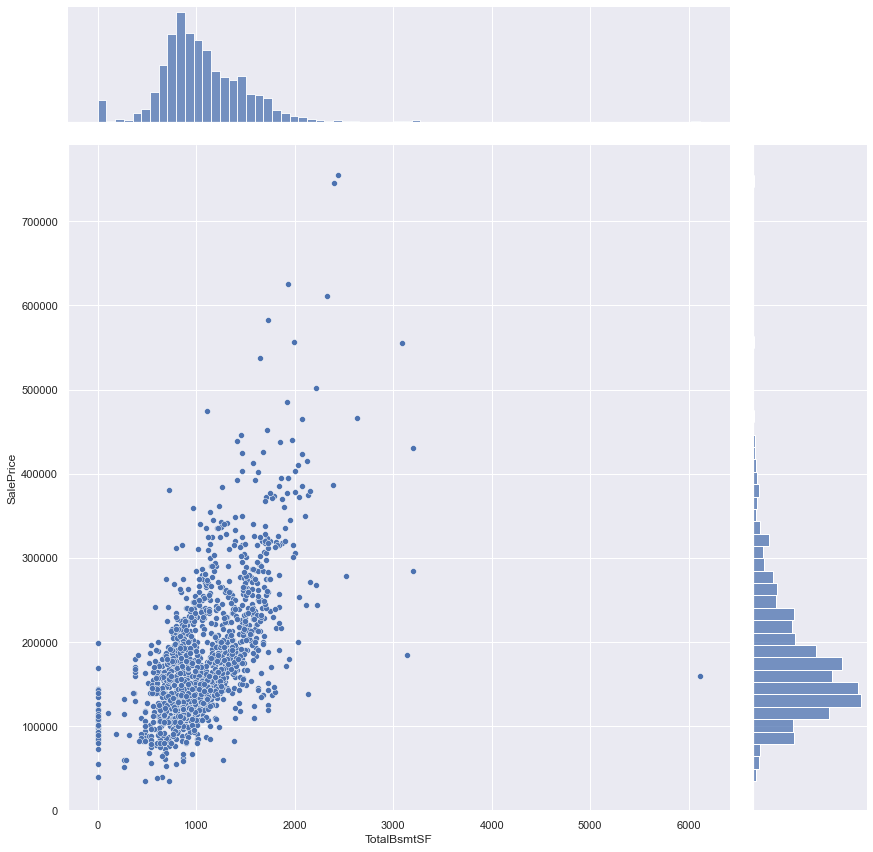

In [28]:
BsmtSale = pd.concat([TotalBsmtSF, SalePrice], axis = 1).reindex(SalePrice.index)
sb.jointplot(data = BsmtSale, x = "TotalBsmtSF", y = "SalePrice", height = 12)

<AxesSubplot:>

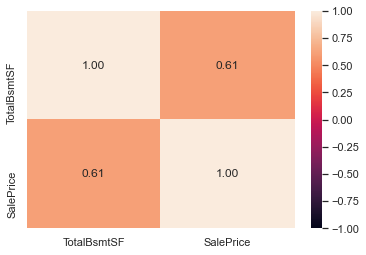

In [29]:
# problem 2 part b for TotalBsmtSF
sb.heatmap(BsmtSale.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [30]:
# problem 2 part c for TotalBsmtSF
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [31]:
# problem 2 part d for TotalBsmtSF
TotalBsmtSF_train = pd.DataFrame(TotalBsmtSF[:1100])
TotalBsmtSF_test = pd.DataFrame(TotalBsmtSF[-360:])

In [32]:
# problem 2 part e and f for TotalBsmtSF
linreg.fit(TotalBsmtSF_train, SalePrice_train)
# SalePrice = a*LotArea + b
print('Coefficients \t: a = ', linreg.coef_)
print('Intercept \t: b = ', linreg.intercept_)

Coefficients 	: a =  [[120.19979559]]
Intercept 	: b =  [54361.70161283]


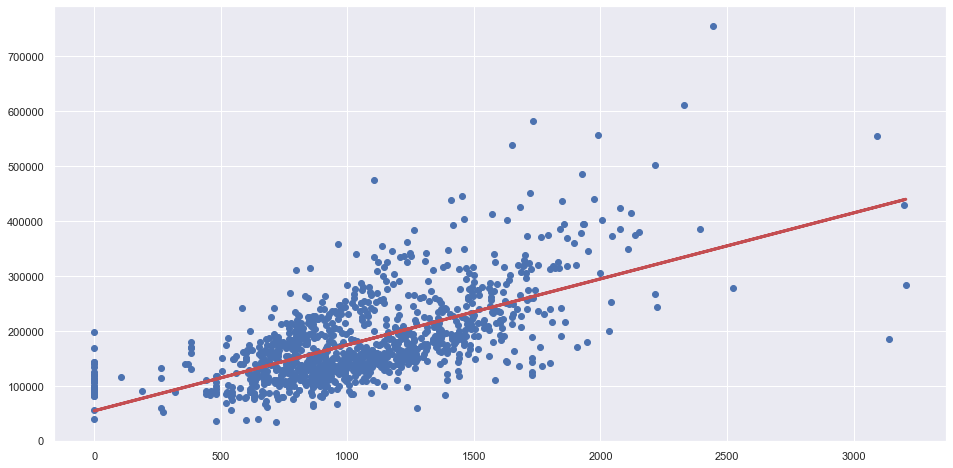

In [56]:
# Formula for the Regression line
regline_x = TotalBsmtSF_train
regline_y = linreg.intercept_ + linreg.coef_ * TotalBsmtSF_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [33]:
# problem 2 part g for TotalBsmtSF
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

SalePrice_train_pred = linreg.predict(TotalBsmtSF_train)
mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.4096515413342241
Mean Squared Error (MSE) 	: 3735705165.951247


In [34]:
# problem 2 part h for TotalBsmtSF
SalePrice_test_pred = linreg.predict(TotalBsmtSF_test)

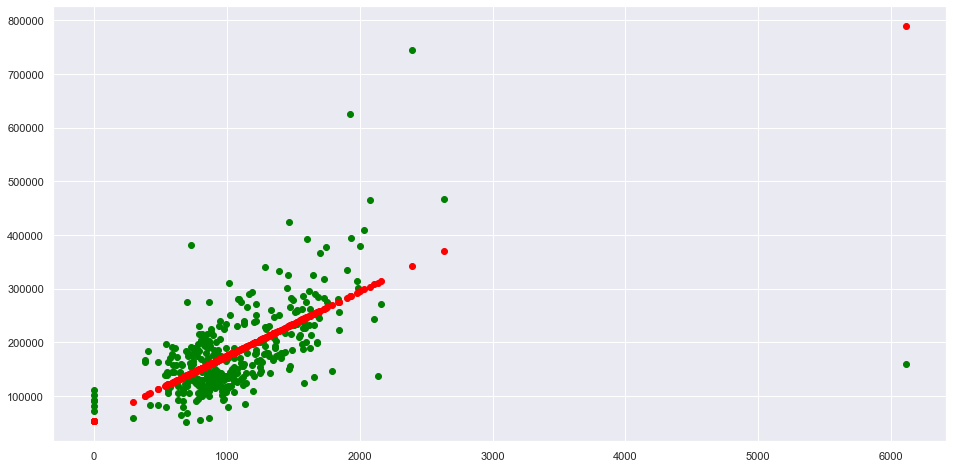

In [110]:
# problem 2 part i for TotalBsmtSF
f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_test, SalePrice_test, color = "green")
plt.scatter(TotalBsmtSF_test, SalePrice_test_pred, color = "red")
plt.show()

In [35]:
# problem 2 part j for TotalBsmtSF
print("Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_test, SalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.26305378699344195
Mean Squared Error (MSE) 	: 4599070168.79018


In [36]:
# problem 2 part a for GarageArea
# repeat the previous methods with GarageArea variable
GarageArea = pd.DataFrame(houseData['GarageArea'])

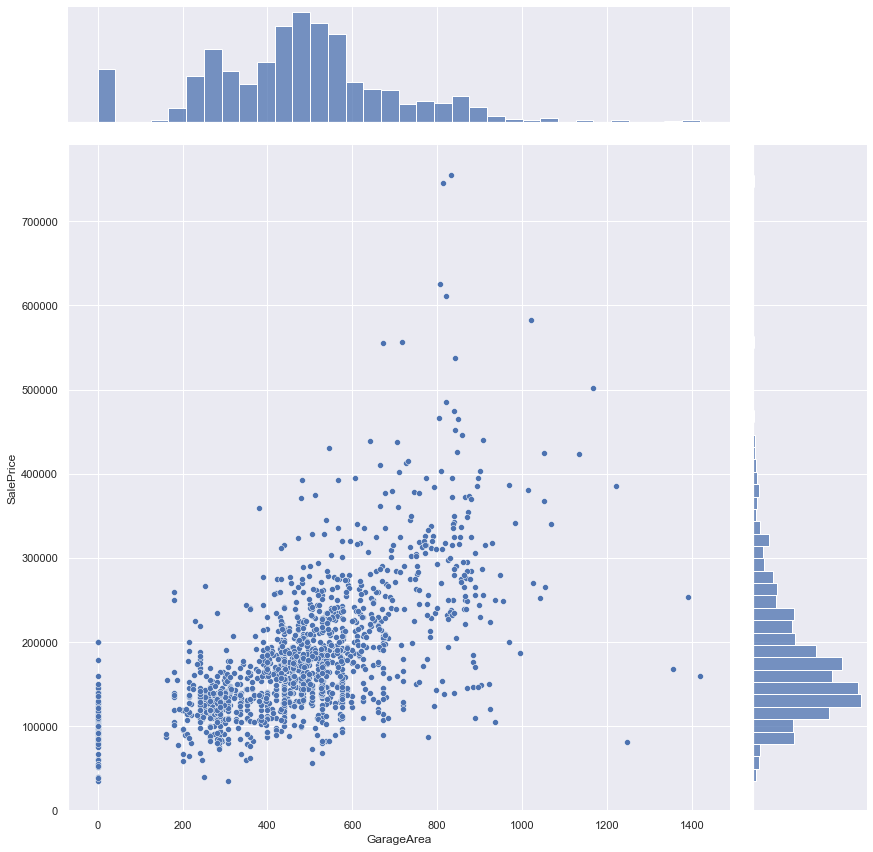

In [38]:
GarageSale = pd.concat([GarageArea, SalePrice], axis = 1).reindex(SalePrice.index)
sb.jointplot(data = GarageSale, x = "GarageArea", y = "SalePrice", height = 12)

<AxesSubplot:>

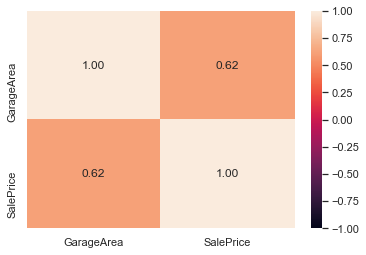

In [39]:
# problem 2 part b for GarageArea
sb.heatmap(GarageSale.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [40]:
# problem 2 part c for GarageArea
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [41]:
# problem 2 part d for GarageArea
GarageArea_train = pd.DataFrame(GarageArea[:1100])
GarageArea_test = pd.DataFrame(GarageArea[-360:])

In [42]:
# problem 2 part e and f for GarageArea
linreg.fit(GarageArea_train, SalePrice_train)
# SalePrice = a*LotArea + b
print('Coefficients \t: a = ', linreg.coef_)
print('Intercept \t: b = ', linreg.intercept_)

Coefficients 	: a =  [[241.42776434]]
Intercept 	: b =  [67131.98072434]


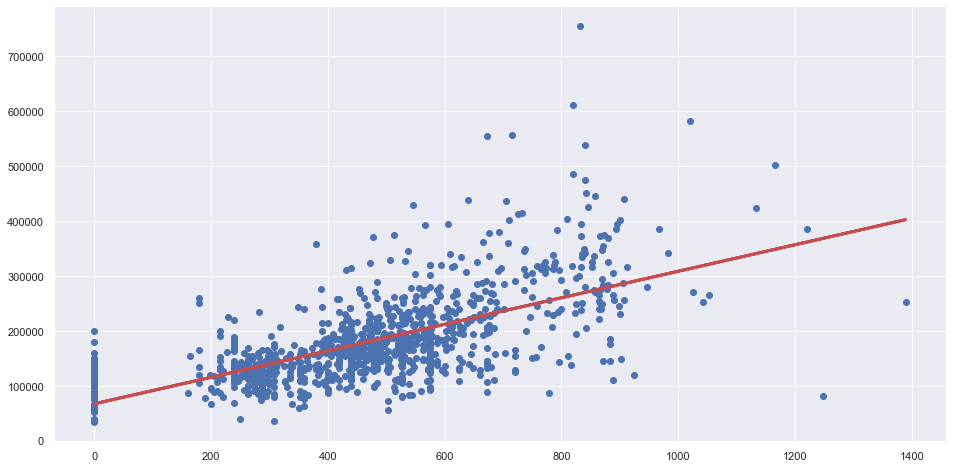

In [66]:
# Formula for the Regression line
regline_x = GarageArea_train
regline_y = linreg.intercept_ + linreg.coef_ * GarageArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [43]:
# problem 2 part g for GarageArea
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GarageArea_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

SalePrice_train_pred = linreg.predict(GarageArea_train)
mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.4052658994757936
Mean Squared Error (MSE) 	: 3763457359.94118


In [44]:
# problem 2 part h for GarageArea
SalePrice_test_pred = linreg.predict(GarageArea_test)

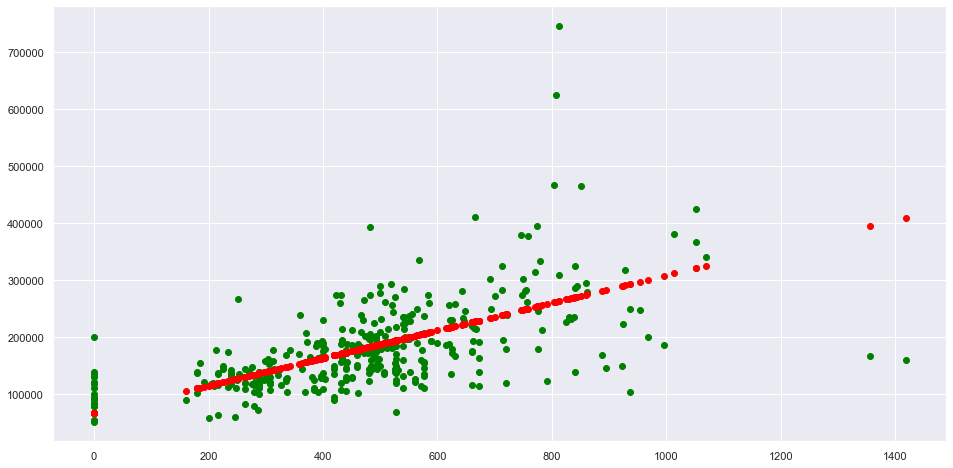

In [124]:
# problem 2 part i for GarageArea
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_test, SalePrice_test, color = "green")
plt.scatter(GarageArea_test, SalePrice_test_pred, color = "red")
plt.show()

In [45]:
# problem 2 part j for GarageArea
print("Explained Variance (R^2) \t:", linreg.score(GarageArea_test, SalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.33415894889143827
Mean Squared Error (MSE) 	: 4155323226.122655


In [47]:
# problem 3
# print the goodness of fit of model among four models
linreg.fit(GrLivArea_train, SalePrice_train)
SalePrice_train_pred_Gr = linreg.predict(GrLivArea_train)
print("Goodness of Fit of Model between GrLivArea and SalePrice")
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_train, SalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_sq_err(SalePrice_train, SalePrice_train_pred_Gr))
print()
linreg.fit(LotArea_train, SalePrice_train)
SalePrice_train_pred_Lot = linreg.predict(LotArea_train)
print("Goodness of Fit of Model between LotArea and SalePrice")
print("Explained Variance (R^2) \t:", linreg.score(LotArea_train, SalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_sq_err(SalePrice_train, SalePrice_train_pred_Lot))
print()
linreg.fit(TotalBsmtSF_train, SalePrice_train)
SalePrice_train_pred_BsmtSF = linreg.predict(TotalBsmtSF_train)
print("Goodness of Fit of Model between TotalBsmtSF and SalePrice")
print("Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_train, SalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_sq_err(SalePrice_train, SalePrice_train_pred_BsmtSF))
print()
linreg.fit(GarageArea_train, SalePrice_train)
SalePrice_train_pred_Garage = linreg.predict(GarageArea_train)
print("Goodness of Fit of Model between GarageArea and SalePrice")
print("Explained Variance (R^2) \t:", linreg.score(GarageArea_train, SalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_sq_err(SalePrice_train, SalePrice_train_pred_Garage))
print()
print("From the information above the best model to predict the SalePrice is GrLivArea because it has the highest R^2 value")

Goodness of Fit of Model between GrLivArea and SalePrice
Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036

Goodness of Fit of Model between LotArea and SalePrice
Explained Variance (R^2) 	: 0.06996047063721678
Mean Squared Error (MSE) 	: 5885258821.936573

Goodness of Fit of Model between TotalBsmtSF and SalePrice
Explained Variance (R^2) 	: 0.4096515413342241
Mean Squared Error (MSE) 	: 3735705165.951247

Goodness of Fit of Model between GarageArea and SalePrice
Explained Variance (R^2) 	: 0.4052658994757936
Mean Squared Error (MSE) 	: 3763457359.94118

From the information above the best model to predict the SalePrice is GrLivArea because it has the highest R^2 value
